In [49]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.vq import vq, kmeans, whiten
from scipy.stats import linregress

In [20]:
test_df = pd.read_csv("./test.csv")
train_df = pd.read_csv("./train.csv")
valid_df = pd.read_csv("./valid.csv")

In [23]:
# add new widths
test_df["box_width"] = test_df["xmax"]-test_df["xmin"]
test_df["box_height"] = test_df["ymax"]-test_df["ymin"]

train_df["box_width"] = train_df["xmax"]-train_df["xmin"]
train_df["box_height"] = train_df["ymax"]-train_df["ymin"]

valid_df["box_width"] = valid_df["xmax"]-valid_df["xmin"]
valid_df["box_height"] = valid_df["ymax"]-valid_df["ymin"]

In [24]:
test_isolate = test_df[["box_width", "box_height"]]
train_isolate = train_df[["box_width", "box_height"]]
valid_isolate = valid_df[["box_width", "box_height"]]

Text(0.5, 1.0, 'Valid width and height')

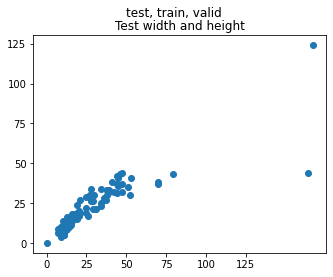

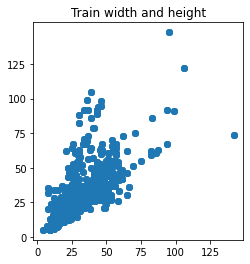

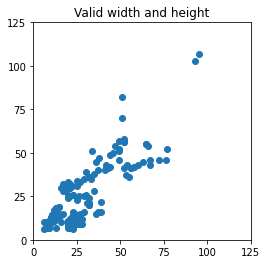

In [52]:
fig, ax1 = plt.subplots()
fig.suptitle('test, train, valid')

ax1.scatter(test_isolate["box_width"], test_isolate["box_height"])
ax1.set_yticks([*range(0, 150, 25)])
ax1.set_xticks([*range(0, 150, 25)])
ax1.set_aspect("equal")
ax1.set_title("Test width and height")

fig, ax2 = plt.subplots()
ax2.scatter(train_isolate["box_width"], train_isolate["box_height"])
ax2.set_yticks([*range(0, 150, 25)])
ax2.set_xticks([*range(0, 150, 25)])
ax2.set_aspect("equal")
ax2.set_title("Train width and height")


fig, ax3 = plt.subplots()
ax3.scatter(valid_isolate["box_width"], valid_isolate["box_height"])
ax3.set_yticks([*range(0, 150, 25)])
ax3.set_xticks([*range(0, 150, 25)])
ax3.set_aspect("equal")
ax3.set_title("Valid width and height")

In [54]:
train_results = linregress(train_isolate["box_width"], train_isolate["box_height"])

test_results = linregress(test_isolate["box_width"], test_isolate["box_height"])

valid_results = linregress(valid_isolate["box_width"], valid_isolate["box_height"])


print(test_results)
print(train_results)
print(valid_results)

LinregressResult(slope=0.5359559613887035, intercept=6.791838297442851, rvalue=0.8713552009271357, pvalue=5.313485208167046e-33, stderr=0.030029453042896323, intercept_stderr=1.089410071630137)
LinregressResult(slope=0.7953199427333166, intercept=8.654557606871524, rvalue=0.6828295083655842, pvalue=1.362037024128719e-185, stderr=0.023202506160475804, intercept_stderr=0.8723687116217632)
LinregressResult(slope=0.845244631360196, intercept=0.946385138519652, rvalue=0.8513594954558641, pvalue=4.576051503197446e-50, stderr=0.03971176388966724, intercept_stderr=1.3103256719034588)


In [65]:
train_isolate

,box_width,box_height
0,82,61
1,75,55
2,18,37
3,8,32
4,46,43
...,...,...
1342,31,50
1343,30,53
1344,32,52
1345,31,51


In [73]:
# sum up results of test, train valid sets
complete_set = None
complete_set = pd.concat([test_isolate, train_isolate, valid_isolate])
complete_set = complete_set.reset_index(drop=True)
complete_set

,box_width,box_height
0,47,37
1,53,41
2,44,37
3,42,32
4,41,38
...,...,...
1619,51,82
1620,52,56
1621,52,56
1622,55,36


Text(0.5, 1.0, 'Complete set')

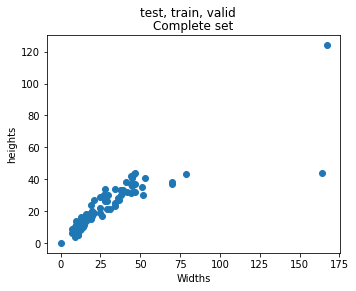

In [75]:
# graph the complete set of data

fig, ax4 = plt.subplots()
fig.suptitle('test, train, valid')

ax4.scatter(test_isolate["box_width"], test_isolate["box_height"])
ax4.set_aspect("equal")
ax4.set_xlabel("Widths")
ax4.set_ylabel("heights")
ax4.set_title("Complete set")

In [76]:
# get linear regression of the complete set

linregress(complete_set["box_width"], complete_set["box_height"])

LinregressResult(slope=0.788277766515715, intercept=7.649891266452862, rvalue=0.7052257515799225, pvalue=1.5113809893609685e-244, stderr=0.01967711400147661, intercept_stderr=0.7290148582903162)

In [80]:
# start k-means clustering

# pandas frame needs to be floats in order for this to work
complete_set.box_width = complete_set["box_width"].astype(float)
complete_set.box_height = complete_set["box_height"].astype(float)

In [91]:
# start k-means clustering

clusters = kmeans(complete_set, 4)

clusters = clusters[0]
xval = [x[0] for x in clusters]
yval = [x[1] for x in clusters]

Text(0.5, 1.0, 'Complete set')

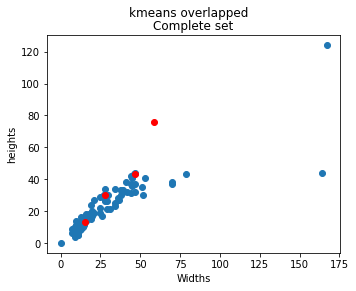

In [92]:
fig, kmn = plt.subplots()
fig.suptitle('kmeans overlapped')

kmn.scatter(test_isolate["box_width"], test_isolate["box_height"])
kmn.scatter(xval, yval, color='r')
kmn.set_aspect("equal")
kmn.set_xlabel("Widths")
kmn.set_ylabel("heights")
kmn.set_title("Complete set")